# ML Bike Share Assignment

Prepared and submitted by B Krishna Murthi.

<b>Problem Statement</b>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

<b>The company wants to know:</b>

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


<b>Business Goal:</b>

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


### Table of content

1. Read understand and visualize the data
2. EDA
3. Prepare the data for modelling
4. Training the model
5. Residual analysis
6. Predictions and evaluation on the test  set
7. Summary

# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

# Step 1 : Read and understanding the data

Here we use  the basic commands to view the data and understand the data


In [2]:
bikeSharing = pd.read_csv("day.csv")
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikeSharing.shape

(730, 16)

In [4]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.


## 1.1 Understanding data


In [6]:
bikeSharing.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [7]:
bikeSharing.mnth.value_counts()
# month is categorical.  can be used to convert to dummy variable

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [8]:
bikeSharing.weekday.value_counts()
# weekday is categorical.  can be used to convert to dummy variable

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [9]:
bikeSharing.workingday.value_counts()
# workingday is binary.  No need to change anything.

1    499
0    231
Name: workingday, dtype: int64

In [10]:
bikeSharing.season.value_counts()
# season is categorical.  can be used to convert to dummy variable

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
bikeSharing.yr.value_counts()


0    365
1    365
Name: yr, dtype: int64

## 2 EDA

### 2.1 Drop columns that are not used for analysis


In [12]:
# Removing fields instant, casual and registered as we wont need for analysis

bikeSharing = bikeSharing.drop(['instant','casual','registered'], axis=1)

# Removing field dteday as we wont need for analysis
bikeSharing = bikeSharing.drop(['dteday'], axis=1)
bikeSharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


### 2.2 Check null values

We can see there are no null values

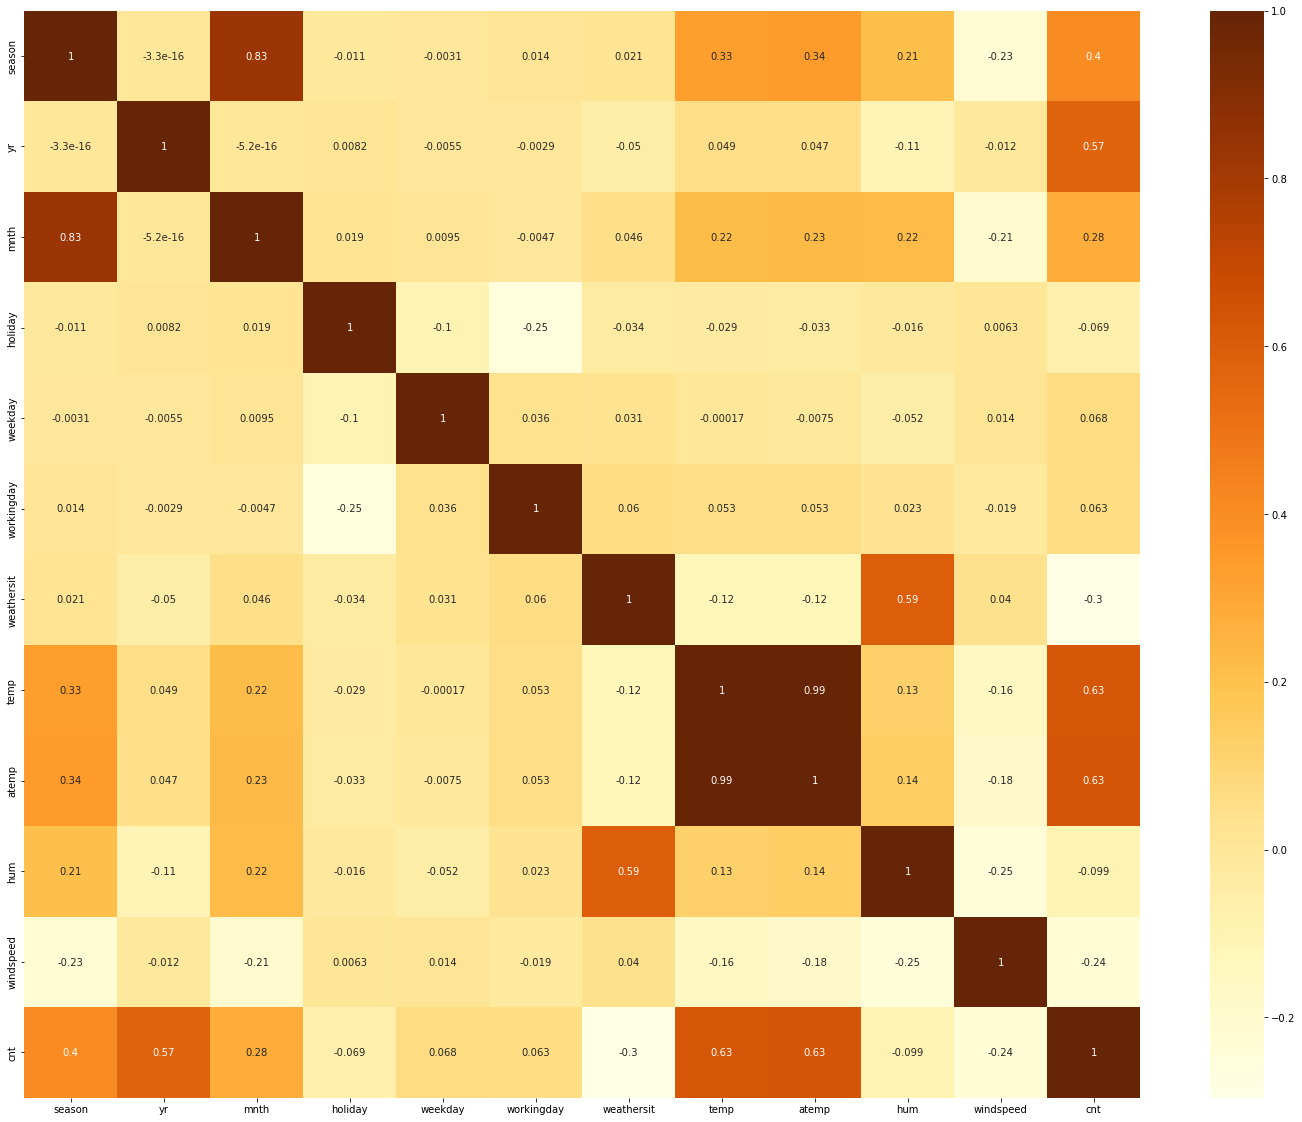

In [13]:
plt.figure(figsize = (25,20))
sns.heatmap(bikeSharing.corr(), annot = True, cmap="YlOrBr")
plt.show()

### 2.3 Understand the uniqueness of the values


In [14]:
#Print number of unique values in all columns
bikeSharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

Observation
- The fields season, year, month, holiday, weekday, working and weathersit are categorical.  That is why they are having few values.  
- This information we can use decide what kind of graph we can use to understand them better with respect to correlation.
- The fields like temp, atemp, hum, windspeed and cnt are numeric


## 2.4 Check for missing values


In [15]:
#Print null counts by column
bikeSharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Observation
- We can see there are no missing values.

## 2.5 Using pairplot 

- to explain a relationship between two variables

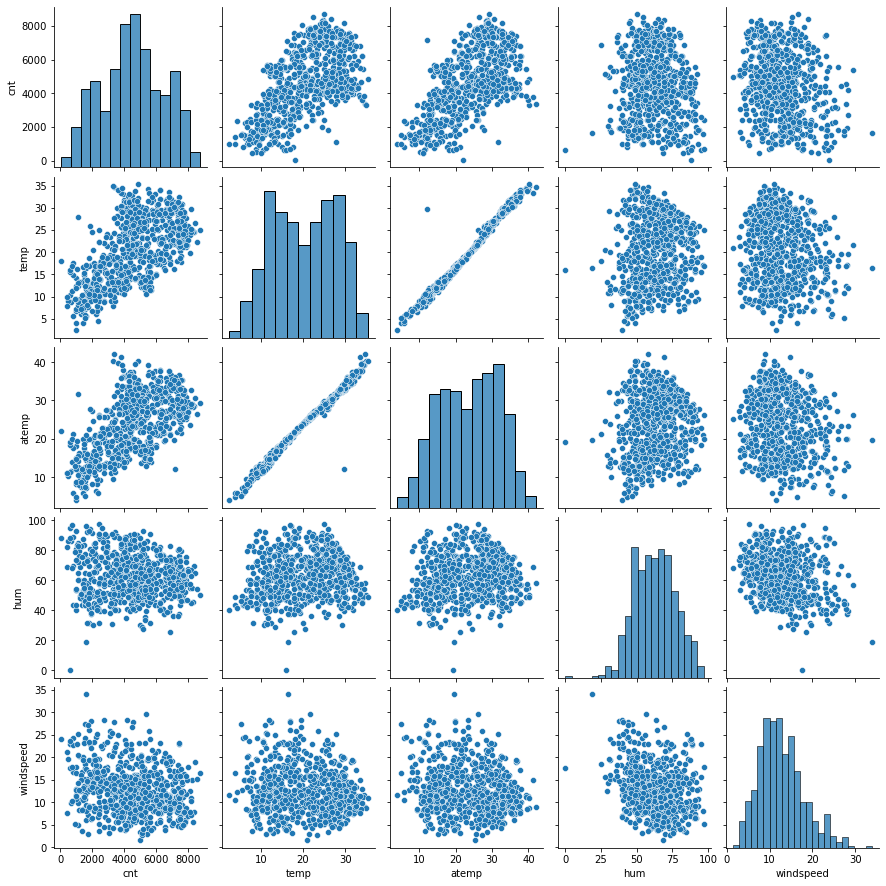

In [16]:
col_names = ['cnt','temp','atemp', 'hum','windspeed']

sns.pairplot(bikeSharing, vars = col_names)
plt.show()

Observation
- We can see the temp and atemp are positively correlated with cnt
- And the temp and atemp are almost forming a straight line showing high correlation, one of the fields to be removed while modelling
- The correlation map shows, cnt has a linear relationship with variables like temp, atemp


### Dropping temp as it is highly coorelated with atemp

In [17]:

# Removing field dteday as we wont need for analysis
bikeSharing = bikeSharing.drop(['temp'], axis=1)


## 2.6 Using box plot for categorical variables

- To visualize the distribution of quantitative values in a variable
- And also helps to see outliers


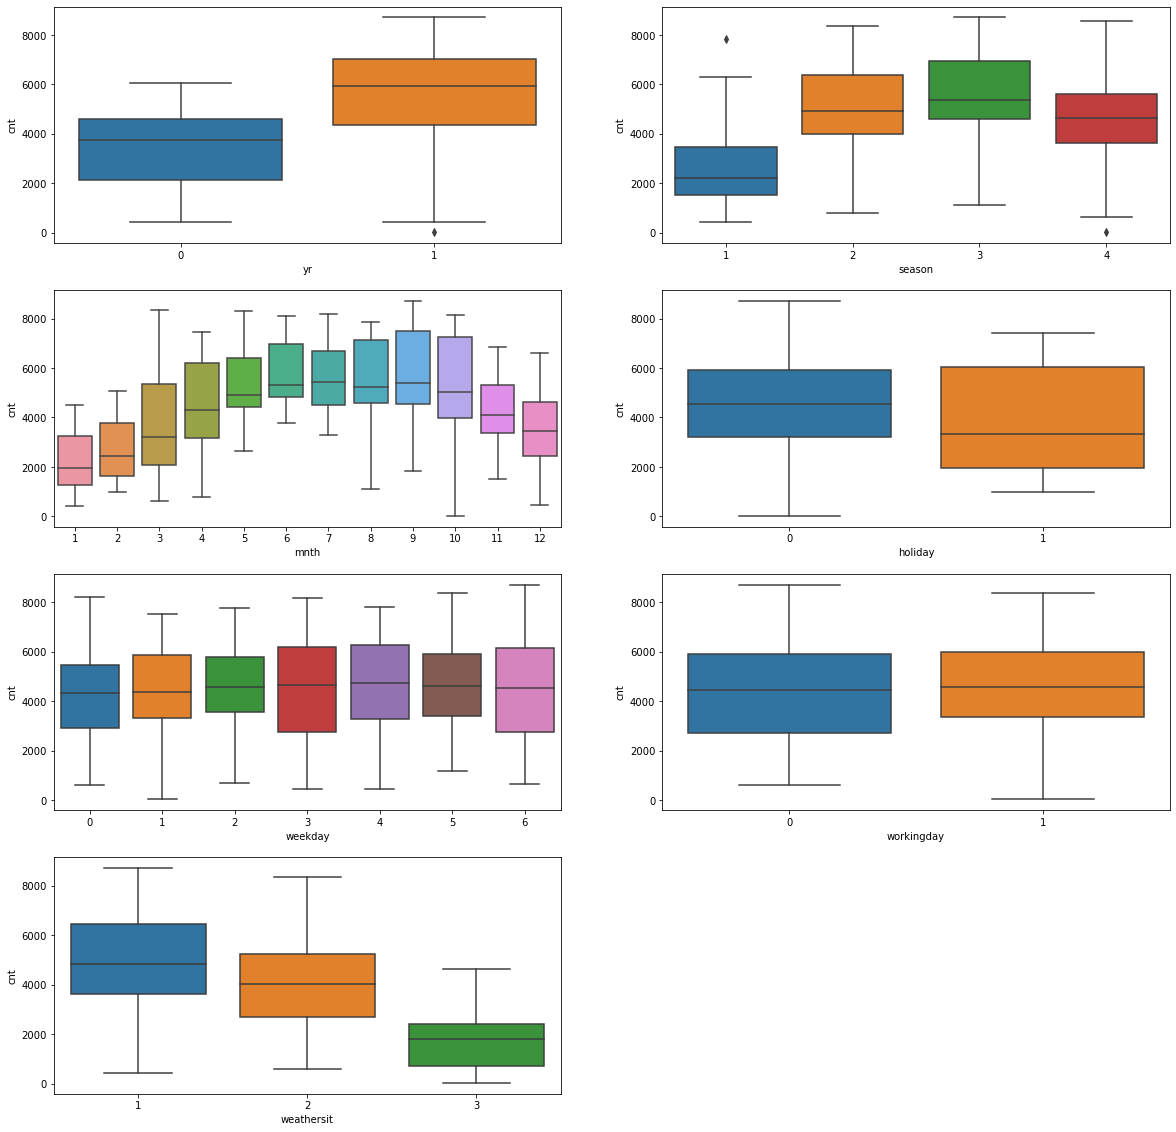

In [18]:
# Boxplot for categorical variables to see demands
vars_cat = ['yr','season','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 20))
for i in enumerate(vars_cat):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data=bikeSharing, x=i[1], y='cnt')
plt.show()


Observation

- year 1 has more demand than year 0.  Shows a growth in demand.
- month wise good demand is between apr to oct months
- During holiday the median is less, showing the demand going less

- The following fields are not good indigators for demand.  All categories are showing similar demand.
    - Working 
    - weekday
- Weather situation is showing strong correlation with booking


## Step 3 - Prepare the data for modelling

1) encoding
    - binary categorial to one and zero
    - other categorical to dummy variables
    
2) Splitting into train and test 

3) rescaling of variables

    

In [19]:
#preparing categorial data to descriptive so it is easy to understand

bikeSharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing.mnth = bikeSharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing.weekday = bikeSharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,11.46350,43.6957,12.522300,1600


## 3.1 Create dummy variables for all categorical variables

In [20]:
# creating dummy variables.  And dropping the first one

bikeSharing = pd.get_dummies(data=bikeSharing,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing = pd.get_dummies(data=bikeSharing,columns=["weathersit"])


- Dropping the first columns as (n-1) dummies can explain n categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [21]:
#Print columns after creating dummies
bikeSharing.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [22]:
#Print few rows to inspect
bikeSharing.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## Splitting the Data into Training and Testing Sets




In [23]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

- We will use MinMax scaling.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
# Apply scaler() to all the columns except the 'boolean' and 'dummy' variables
num_vars = ['atemp','hum','windspeed','cnt' ]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1



### Dividing into X and Y sets for the model building


In [26]:
y_train = df_train.pop('cnt')  # only cnt is saved here
X_train = df_train             # rest of the fields are in X_train

# Building model using statsmodel, for the detailed statistics

Using fields selected from RFE and manually dropping variables

### RFE

Using Recursive feature elimination to pick <b>15</b> fields and using manual method to verify and remove variables.

Also the logic to drop a variable is as follows:

- high p-value and high VIF
- High - low
  - high p-value and low VIF
  - low  p-value and high VIF
- low p-value and low VIF




In [27]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]


In [30]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

<b> Function for building model and pring VIF</b>

This function will be called, so the code looks more readable.

In [31]:
#Function to build a model using statsmodel api - Takes the X_train for model as a parameter
def build_model(X_train):
    X_train_sm = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm


In [32]:
#Function to calculate VIFs and print them - Takes the X_train for which VIF to be calcualted as a parameter
def get_vif(X_train):
    df1 = X_train
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print("")
    print(" --- Comparing VIF values --- ")
    print("")
    
    print(vif.sort_values(by='VIF',ascending=False))

### Check VIF


In [33]:
# Check for the VIF values of the feature variables. 

#calling the function to print VIF
get_vif(X_train_rfe)



 --- Comparing VIF values --- 

           Features    VIF
3               hum  19.59
2             atemp  19.41
4         windspeed   4.15
14  weathersit_good   3.29
5     season_spring   3.09
6     season_winter   2.98
0                yr   2.06
10         mnth_nov   1.83
8          mnth_jan   1.76
7          mnth_dec   1.56
9          mnth_jul   1.41
11        mnth_sept   1.22
12      weekday_sat   1.19
13   weathersit_bad   1.16
1           holiday   1.06


## Check R-squared and P values

In [34]:


build_model(X_train_rfe)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 09 May 2022   Prob (F-statistic):          9.67e-187
Time:                        07:29:36   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3079      0.036     

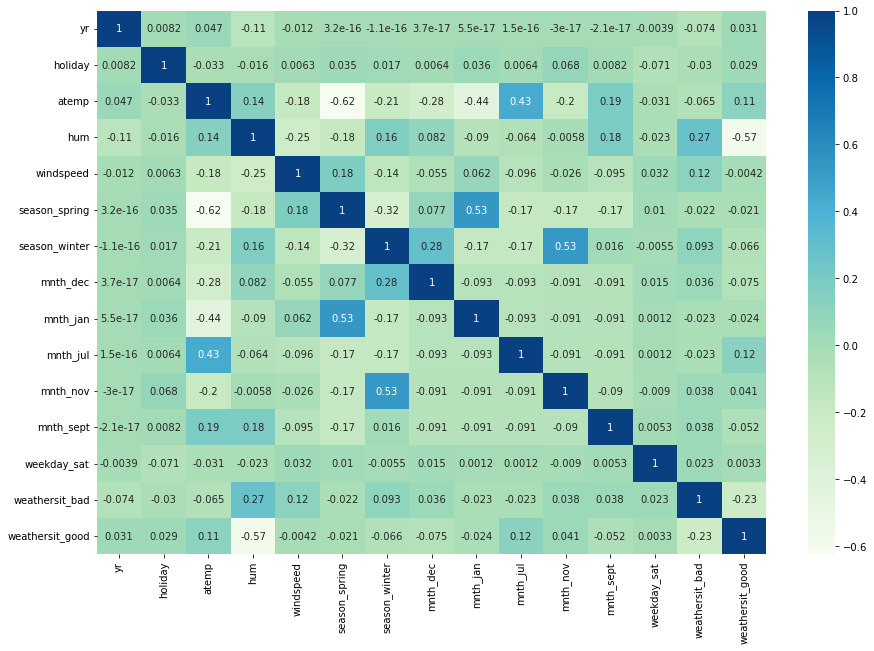

In [35]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing[X_train_rfe.columns].corr(), cmap='GnBu', annot=True)
plt.show()

## Model 2 Dropping hum

-  Removing the variable hum based on the high VIF

In [36]:
# Dropping the variable  

X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

get_vif(X_train_rfe)

build_model(X_train_rfe)



 --- Comparing VIF values --- 

           Features   VIF
2             atemp  5.31
3         windspeed  4.01
13  weathersit_good  2.85
5     season_winter  2.54
4     season_spring  2.43
0                yr  2.06
9          mnth_nov  1.81
7          mnth_jan  1.63
6          mnth_dec  1.46
8          mnth_jul  1.34
10        mnth_sept  1.21
11      weekday_sat  1.19
12   weathersit_bad  1.12
1           holiday  1.06
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.10e-184
Time:                        07:29:38   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:           

## Dropping weekday_sat 


- Removing the variable weekday_sat based on the high VIF
- Though atemp is showing VIF more than 5, we would like to see how the calculation changes after removal of this above mentioned field

In [37]:
# Dropping the variable 
X_train_rfe = X_train_rfe.drop(["weekday_sat"], axis = 1)

get_vif(X_train_rfe)

X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())



 --- Comparing VIF values --- 

           Features   VIF
2             atemp  5.27
3         windspeed  3.98
12  weathersit_good  2.85
5     season_winter  2.53
4     season_spring  2.42
0                yr  2.06
9          mnth_nov  1.81
7          mnth_jan  1.63
6          mnth_dec  1.46
8          mnth_jul  1.34
10        mnth_sept  1.21
11   weathersit_bad  1.12
1           holiday  1.06
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 09 May 2022   Prob (F-statistic):          3.95e-185
Time:                        07:29:39   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:      

## Dropping mnth_nov


- Removing the variable mnth_nov based on the high VIF
- Though atemp is showing VIF more than 5, we would like to see how the calculation changes after removal of this above mentioned field

In [38]:
# Dropping the variable 
X_train_rfe = X_train_rfe.drop(["mnth_nov"], axis = 1)

get_vif(X_train_rfe)


X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())



 --- Comparing VIF values --- 

           Features   VIF
2             atemp  5.21
3         windspeed  3.94
11  weathersit_good  2.84
4     season_spring  2.42
0                yr  2.06
5     season_winter  1.65
7          mnth_jan  1.63
8          mnth_jul  1.34
6          mnth_dec  1.29
9         mnth_sept  1.20
10   weathersit_bad  1.12
1           holiday  1.04
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.6
Date:                Mon, 09 May 2022   Prob (F-statistic):          8.41e-185
Time:                        07:29:39   Log-Likelihood:                 495.96
No. Observations:                 510   AIC:                            -965.9
Df Residuals:                     497   BIC:                            -910

In [39]:
# Dropping the variable 
X_train_rfe = X_train_rfe.drop(["mnth_dec"], axis = 1)

get_vif(X_train_rfe)


X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())



 --- Comparing VIF values --- 

           Features   VIF
2             atemp  5.20
3         windspeed  3.94
10  weathersit_good  2.84
4     season_spring  2.31
0                yr  2.06
6          mnth_jan  1.59
5     season_winter  1.40
7          mnth_jul  1.34
8         mnth_sept  1.20
9    weathersit_bad  1.12
1           holiday  1.04
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 09 May 2022   Prob (F-statistic):          5.75e-185
Time:                        07:29:39   Log-Likelihood:                 493.54
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.3
Df Model:              

In [40]:
# Dropping the variable 
X_train_rfe = X_train_rfe.drop(["mnth_jan"], axis = 1)

get_vif(X_train_rfe)


X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())


 --- Comparing VIF values --- 

          Features   VIF
2            atemp  5.19
3        windspeed  3.94
9  weathersit_good  2.84
0               yr  2.05
4    season_spring  1.68
5    season_winter  1.40
6         mnth_jul  1.33
7        mnth_sept  1.20
8   weathersit_bad  1.11
1          holiday  1.04
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Mon, 09 May 2022   Prob (F-statistic):          5.68e-185
Time:                        07:29:39   Log-Likelihood:                 490.70
No. Observations:                 510   AIC:                            -959.4
Df Residuals:                     499   BIC:                            -912.8
Df Model:                          10                       

In [41]:
# Print rsquared and rsquared_adj from model

print(lm.rsquared_adj)
print(lm.rsquared)



0.8268274650662077
0.8302296759686398


#### Observation


This model is good based on the following observation
- There are less Multicollinearity between the predictors 
- The p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).


## Model interpretation




A) Model coeff values

const               0.1727     
yr                  0.2351     
holiday            -0.0951     
atemp               0.4642     
windspeed          -0.1256     
season_spring      -0.1174     
season_winter       0.0390     
mnth_jul           -0.0680     
mnth_sept           0.0601     
weathersit_bad     -0.2002     
weathersit_good     0.0817     



The equation of best fitted surface based on model:
cnt = 0.1727  + (yr × 0.2351) + (holiday x -0.0951 ) + (atemp * 0.4642 ) + (windspeed * -0.1256) +  (season_spring * -0.1174) + (season_winter *  0.0390) + (mnth_jul * -0.0680) + (mnth_sept *  0.0601) + (weathersit_bad * -0.2002) + (weathersit_good *  0.0817) 

# ASSUMPTIONS

## 1 Error terms are normally distributed with mean zero

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


Text(0.5, 0, 'Errors')

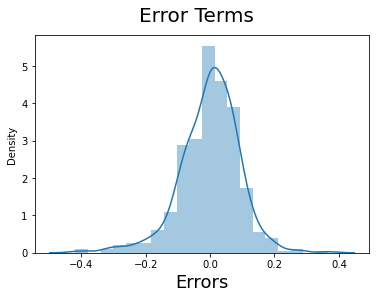

In [42]:
y_train_cnt = lm.predict(X_train_sm)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label



<b>Observation</b>

- Residuals are normally distributed
- The first and important assumption for Linear Regression is valid

## 2. There is a linear relationship between X and Y¶


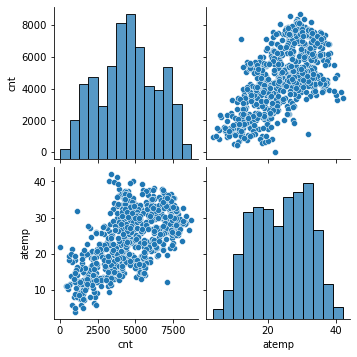

In [43]:
col_names = ['cnt','atemp']

sns.pairplot(bikeSharing, vars = col_names)
plt.show()

## 3. No Multicollinearity exists between the predictor variables

The values (other than the atemp) are well below 5.

In [44]:
get_vif(X_train_rfe)




 --- Comparing VIF values --- 

          Features   VIF
2            atemp  5.19
3        windspeed  3.94
9  weathersit_good  2.84
0               yr  2.05
4    season_spring  1.68
5    season_winter  1.40
6         mnth_jul  1.33
7        mnth_sept  1.20
8   weathersit_bad  1.11
1          holiday  1.04


#### Summary observation on assumption

So we can see the model satisfies first three assumptions of linear regression.



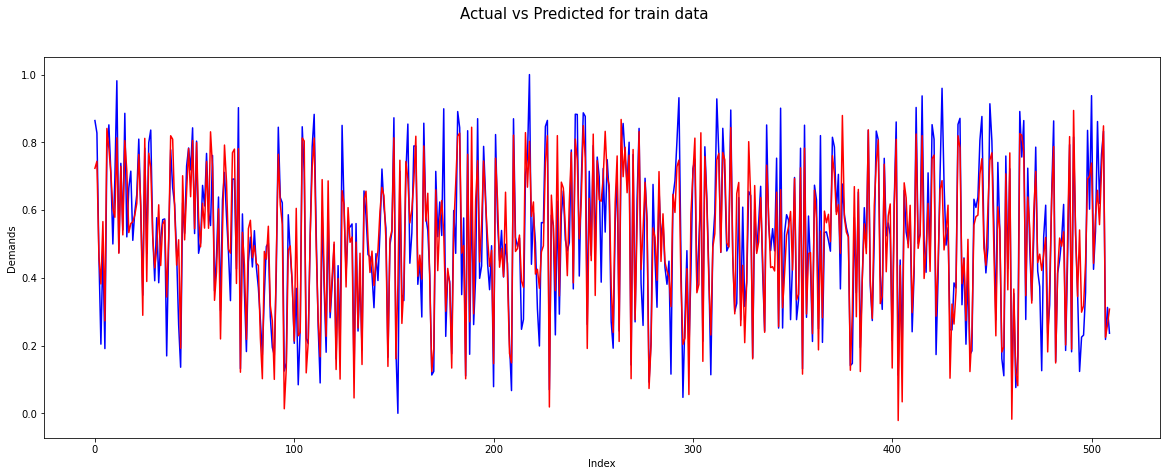

In [45]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(20,7))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_cnt, color="red")
plt.suptitle('Actual vs Predicted for train data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Making Predictions


Applying the scaling on the test sets


In [46]:
X_train_sm.columns

X_train_sm = X_train_sm.drop(['const'], axis=1)

In [47]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','hum','windspeed','cnt' ]

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,1,0,1,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [48]:
y_test = df_test.pop('cnt')
X_test = df_test

In [49]:
X_train_sm.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_jul', 'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [50]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = df_test[X_train_sm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [51]:
# Making predictions
y_pred = lm.predict(X_test_new)  # this is to predict the cnt ie., demand for bike

Text(0, 0.5, 'y_pred')

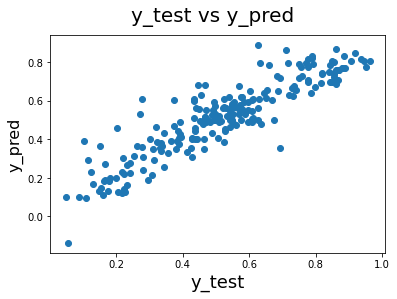

In [52]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

<AxesSubplot:ylabel='Density'>

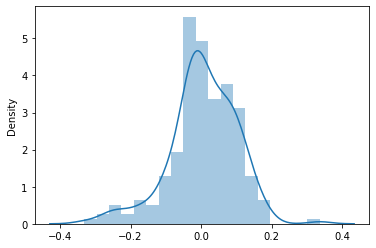

In [53]:
res = y_test - y_pred
sns.distplot(res)

In [54]:
from sklearn.metrics  import r2_score

r2_score(y_true = y_train, y_pred = y_train_cnt)

0.8302296759686398

In [55]:
from sklearn.metrics  import r2_score

r2_score(y_true = y_test, y_pred = y_pred)

0.8089924291633277

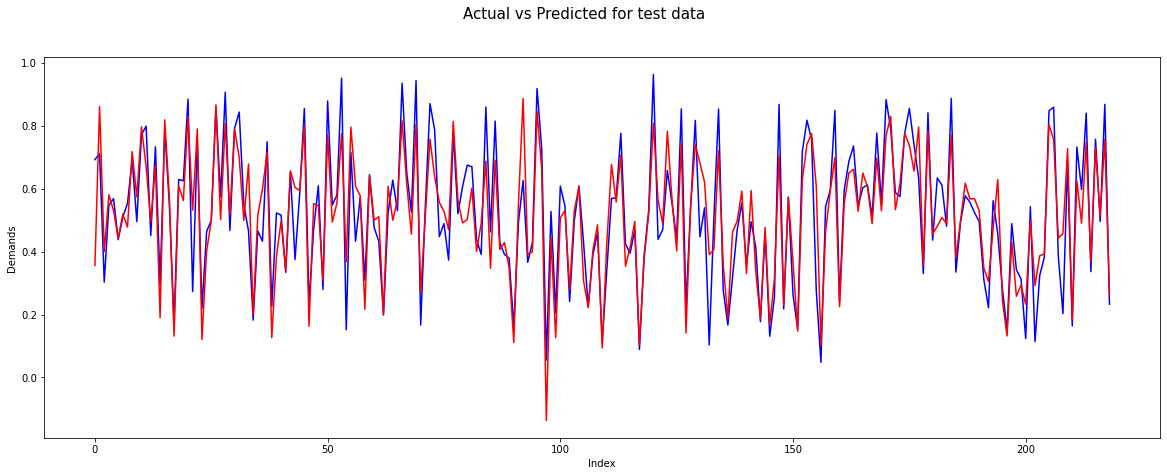

In [56]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test),1)]
plt.figure(figsize=(20,7))
plt.plot(c,y_test, color="blue")
plt.plot(c,y_pred, color="red")
plt.suptitle('Actual vs Predicted for test data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## Final Result Comparison

Train R^2 :0.824
Train Adjusted R^2 :0.821

Test R^2 :0.820
Test Adjusted R^2 :0.812

This seems to be a really good model that can very well 'Generalize' various datasets.

# FINAL REPORT

As per our final Model, the top 5 predictor variables that influences the bike booking are:


| Variable  | Coefficient | Description |
| :------------- | ---------------: | :--------------- |
| atemp         | 0.4642 | Indicates that a unit increase in temp variable increases the bike hire numbers by this many units |
| yr            | 0.2351 | Indicates that a unit increase in yr variable increases the bike hire numbers by this many units  |
| weathersit_bad| -0.2002 | Indicates that a unit increase in weathersituation bad variable <b>decreases</b> the bike hire numbers by this many units  |
| windspeed     | -0.1256 | Indicates that a unit increase in windspeed variable <b>decreases</b> the bike hire numbers by this many units  |
| season_spring | -0.1174 | Indicates that a unit increase in season_spring variable <b>decreases</b> the bike hire numbers by this many units  |


Other fields to predict the demand for bikes.

- holiday  (-0.0951)
- weathersit_good (0.0817)
- mnth_jul ( -0.068)
- mnth_sept (0.0601)
- season_winter (0.039)


